In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

/usr/local/lib/python3.12/dist-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


KeyboardInterrupt: 

In [ ]:
x = np.array([[1], [2], [3], [4], [5]])
y = np.array([3, 5, 7, 9, 11])  # Line: y = 2x + 1

In [ ]:
# Initialize parameters
w = np.random.randn(1)  # Weight (slope)
b = np.random.randn(1)  # intercept
alpha = 0.01  # learning rate
epochs = 1000
m = len(x)

In [ ]:
for epoch in range(epochs):
    x = x.reshape(-1, 1)
    sum_errors_b = 0
    sum_errors_w = 0
    y_pred = np.dot(x,w.T) + b
    error = y_pred - y
    sum_errors_b = np.sum(error)
    sum_errors_w = np.dot(error.T,x)
    d_b = (2/m) * sum_errors_b
    d_w = (2/m) * sum_errors_w
    w = w - alpha * d_w
    b = b - alpha * d_b
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: w = {w[0]:.4f}, b = {b[0]:.4f}") 
y_pred_final = np.dot(x,w) + b
mse = (1/(2*m)) * np.sum((y_pred_final - y) ** 2)
print(f"Mean Squared Error (MSE): {mse:.4f}")

In [ ]:
plt.scatter(x, y, color='blue', label='Data points',marker='*')
plt.plot(x, y_pred_final, color='red', label='Data points')
plt.show()

In [36]:
class LinearRegressionSelf:
    def __init__(self,learning_rate=0.01,n_iters=1000):
        self.alpha = learning_rate
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.loss_history = []
        
    def fit(self,X,y):
        # Training the model using gradient descent
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0
        for epoch in range (self.n_iters):
            y_pred = np.dot(X,self.w) + self.b
            error = y_pred-y
            dw = 1/m * np.dot(X.T,error)
            db = 1/m * np.sum(error)
            self.w = self.w - self.alpha * dw
            self.b = self.b - self.alpha * db  
            loss = np.mean(error ** 2)
            self.loss_history.append(loss)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: w = {self.w[0]:.4f}, b = {self.b:.4f}") 

    def predict(self,X):
        # Predicts the y for the given input X
        y_pred = np.dot(X,self.w) + self.b
        return y_pred

    def plot_loss(self):
        plt.figure(figsize=(8, 5))
        plt.plot(range(self.n_iters), self.loss_history, color='blue')
        plt.title('Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Mean Squared Error')
        plt.grid(True)
        plt.show()
        
    def plot_predictions(self,X, y, predictions):
        plt.figure(figsize=(8, 5))
        plt.plot(X, y, label='Actual', color='blue', marker='o')
        plt.plot(X, predictions, label='Predicted', color='red', linestyle='--', marker='x')
        plt.title('Linear Regression: Predictions vs Actual')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    def plot_predictions_vs_actual(self, y_true, y_pred):
        plt.figure(figsize=(8,5))
        plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
        plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # line y=x
        plt.xlabel('Actual Prices')
        plt.ylabel('Predicted Prices')
        plt.title('Actual vs Predicted House Prices')
        plt.grid(True)
        plt.show()

Epoch 0: w = 0.2500, b = 0.0700
Predictions: [ 2.74710038  4.8439743   6.94084821  9.03772213 11.13459605]


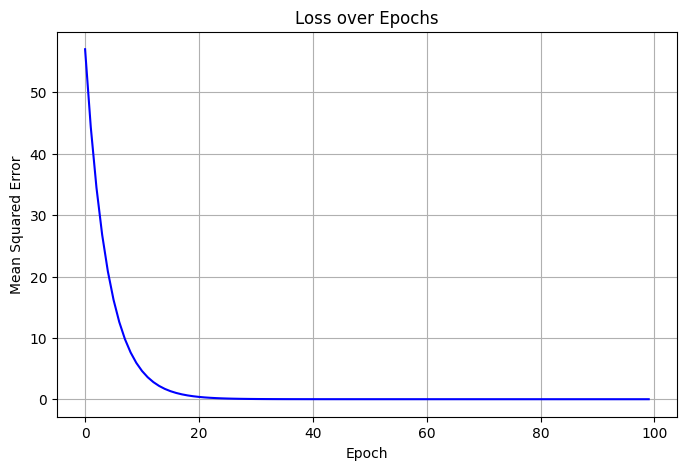

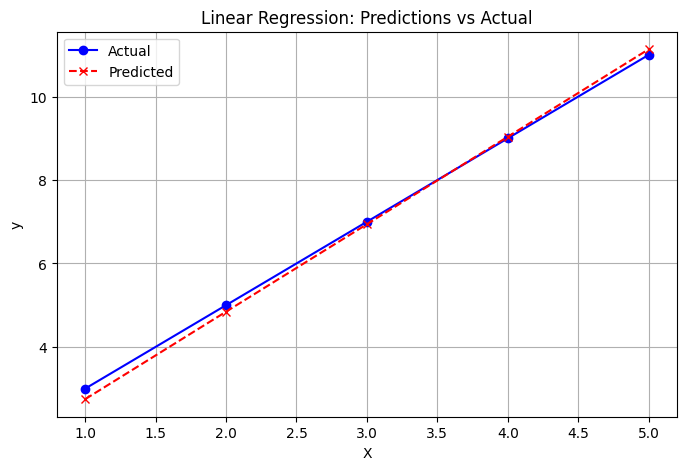

In [13]:
X = np.array([[1], [2], [3], [4], [5]])
# Targets (y): 1D array
y = np.array([3, 5, 7, 9, 11])  # y = 2x + 1
model = LinearRegressionSelf(learning_rate=0.01, n_iters=100)
model.fit(X, y)
preds = model.predict(X)
print("Predictions:", preds)
model.plot_loss()
model.plot_predictions(X,y,preds)

## HOUSE PRICE PREDICTION

In [3]:
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled

In [4]:
df = pd.read_csv('house_data.csv')
df = df.dropna()
X = df.drop(['price','date','street','city','statezip','country'],axis=1).values
X = standardize(X)
y = df['price'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print(X_train.shape,y_test.shape)

(3680, 12) (920,)


Epoch 0: w = 1121.6875, b = 5448.4827
Epoch 100: w = 5768.4022, b = 347792.8174
Epoch 200: w = -17173.4968, b = 472869.8753
Epoch 300: w = -32426.9704, b = 518444.1421
Epoch 400: w = -42041.9081, b = 534996.9754
Epoch 500: w = -48114.3538, b = 540972.5301
Epoch 600: w = -51965.0649, b = 543105.1279
Epoch 700: w = -54411.9554, b = 543849.7899
Epoch 800: w = -55967.3517, b = 544098.7426
Epoch 900: w = -56955.1857, b = 544174.3743
Predictions: [ 306393.36382413  328795.16628712 1073486.84512314  546973.62574647
  382035.27788033  604760.5870715   479586.17952592  420100.36112413
  510002.00687061  531429.62467048]


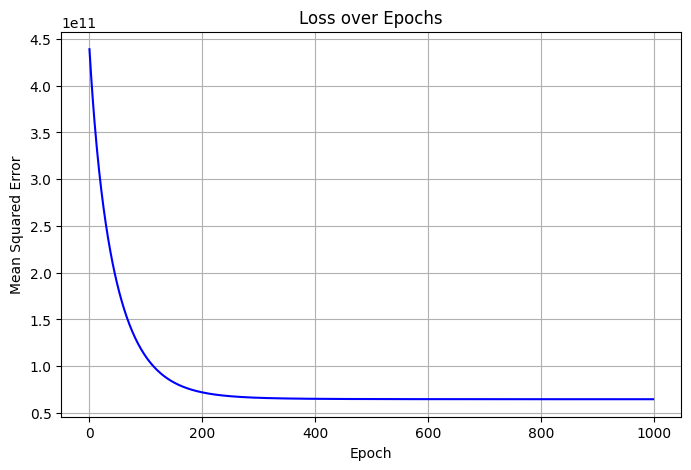

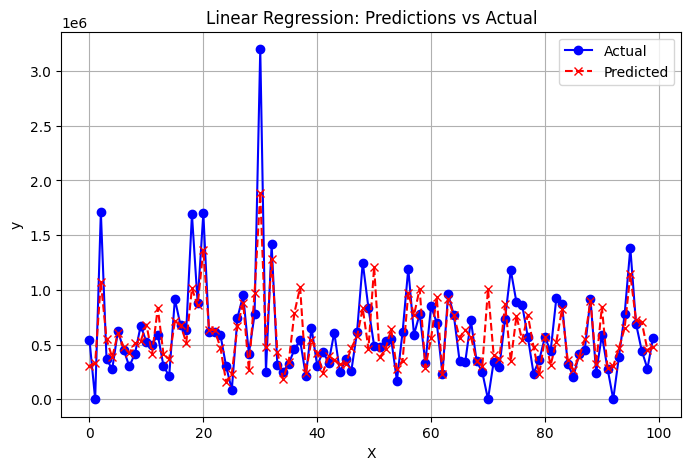

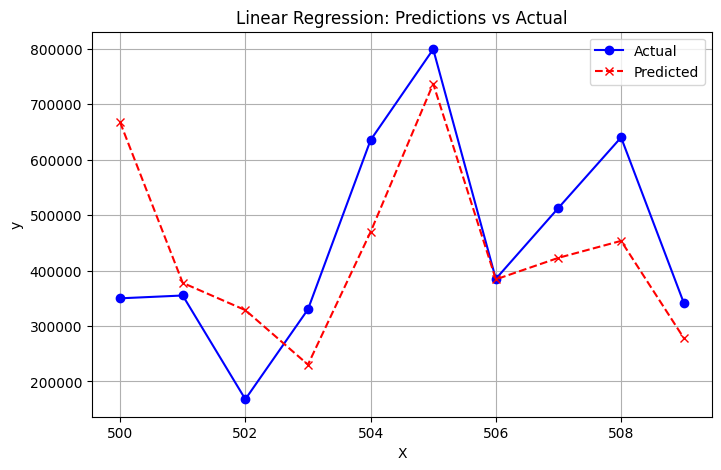

In [33]:
model = LinearRegressionSelf(learning_rate=0.01, n_iters=1000)
model.fit(X_train, y_train)
preds = model.predict(X_test)
preds_train = model.predict(X_train)
print("Predictions:", preds[:10])
model.plot_loss()
model.plot_predictions(np.arange(100), y_test[:100], preds[:100])
model.plot_predictions(
    np.arange(500, 510),
    y_test[500:510],
    preds[500:510]
)


In [34]:
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)

Mean Absolute Error (MAE): 210759.14640801313
Mean Squared Error (MSE): 986608166705.6411
Root Mean Squared Error (RMSE): 993281.5143279579
R-squared Score: 0.03259135428037074


In [35]:
mae = mean_absolute_error(y_train, preds_train)
mse = mean_squared_error(y_train, preds_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, preds_train)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)

Mean Absolute Error (MAE): 158769.20766392266
Mean Squared Error (MSE): 64769482532.72838
Root Mean Squared Error (RMSE): 254498.4922012867
R-squared Score: 0.5441526233242753


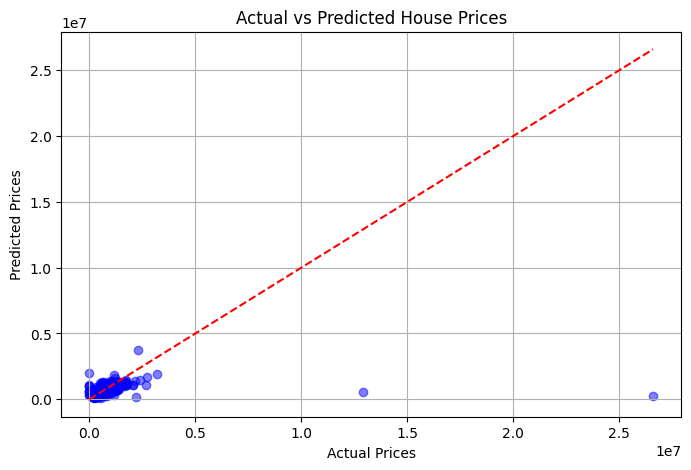

In [26]:
model.plot_predictions_vs_actual(y_test, preds)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_sklearn = lr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_sklearn))
print("MSE:", mean_squared_error(y_test, y_pred_sklearn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_sklearn)))
print("R2:", r2_score(y_test, y_pred_sklearn))

MAE: 210908.17325011524
MSE: 986921767056.1313
RMSE: 993439.3625461654
R2: 0.03228385663277078
